

# ColabにkaggleAPIを使ってデータセットを取得



ドライブをマウント　正式版により二行まで改良

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


kaggle api取得のためのパッケージ

In [5]:
!pip install kaggle

Colabへkaggle.jsonのダウンロード

In [3]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


一度kaggle listを入力したあとエラーが発生した場合打ち込む　https://www.kaggle.com/general/63950

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2517           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9693           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       3987           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         26           False  
two-sigma-financial-news                       2019-01-08 23:59:00  Featured          $100,000        407           False  
competitive-data-science-predict-future-sales  2019-01-01 23:59:00  Playground           Kudos       1502           False  
PLAsTiCC

データセットのkaggle apiをコピペ　-p の後ろにディレクトリを指定可能
ドライブをマウントしておけばデータの保存ができる

In [7]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -p drive/My\ Drive/機械学習

 99% 268M/271M [00:02<00:00, 120MB/s]
100% 271M/271M [00:02<00:00, 96.2MB/s]
 98% 535M/544M [00:04<00:00, 124MB/s]
100% 544M/544M [00:04<00:00, 116MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 18.6MB/s]


注意：今回データセット作成のために必要なのはtrainデータ
これをtrainとvalidationとtestに新たに分割する
そのためパスの指定をtrainデータにする必要がある

In [0]:
#こっちはテストデータ
#!unzip test.zip

In [5]:
!ls

Boston_Housing_data.ipynb		    overfit_and_underfit.ipynb
CNN_1.ipynb				    reuters_data.ipynb
CNN_2.ipynb				    sample_submission.csv
CNN_3.ipynb				    train
deep-learning-with-python-notebooks-master


In [0]:
os.chdir('drive/My Drive/機械学習')

In [0]:
!unzip train.zip

In [0]:
import os, shutil

In [0]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'train'

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

健全性チェックのため個数の確認

In [40]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [15]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [16]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [17]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [18]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [19]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# ネットワークの構築

犬と猫を分類するための小さなCNNをインスタンス化

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

モデルのコンパイル

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

# データの前処理

ImageDataGeneratorを使ってディレクトリから画像を読み込む

In [44]:
from keras.preprocessing.image import ImageDataGenerator

# 全ての画像を1/255でスケーリング
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


バッチジェネレータを使ってモデルを適合

In [46]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6890 - acc: 0.5425 - val_loss: 0.6691 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6534 - acc: 0.6245 - val_loss: 0.6276 - val_acc: 0.6720
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.6062 - acc: 0.6720 - val_loss: 0.6237 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5667 - acc: 0.7045 - val_loss: 0.5847 - val_acc: 0.7070
Epoch 5/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5363 - acc: 0.7350 - val_loss: 0.5794 - val_acc: 0.6840
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5096 - acc: 0.7430 - val_loss: 0.5700 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4794 - acc: 0.7630 - val_loss: 0.5548 - val_acc: 0.7140
Epoch 8/30
100/100 [==============================] - 1

モデルを保存

In [0]:
model.save('cats_and_dogs_small_1.h5')

訓練時の損失地と正解率をプロット

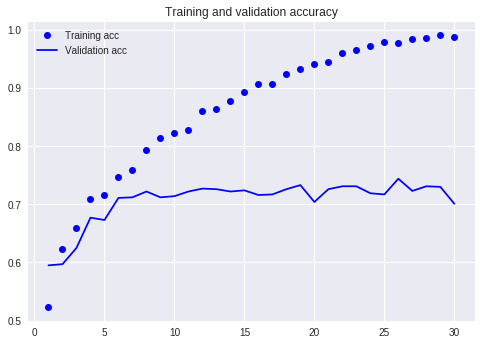

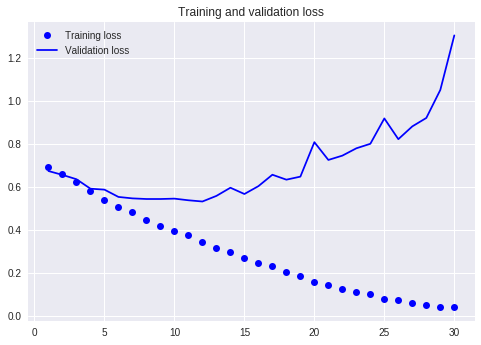

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# 損失地をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# データ拡張

ImageDataGeneratorを通じてデータ拡張を設定する

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

ランダムに水増しされた訓練画像の表示

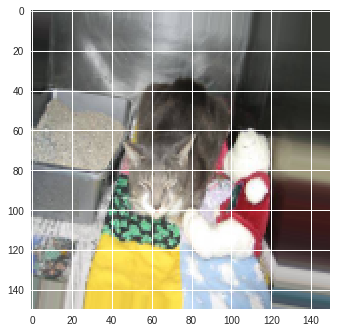

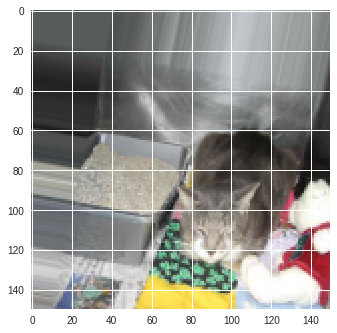

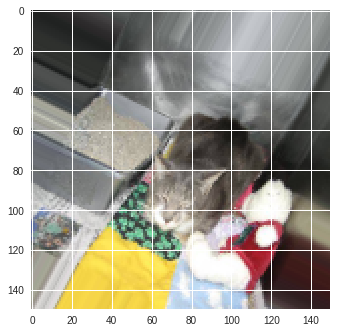

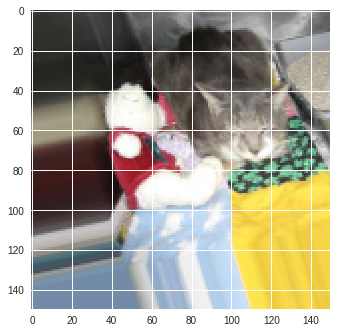

In [29]:
# 画像処理ユーティリティのモジュール
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname)
         for fname in os.listdir(train_cats_dir)]

# 水増しする画像を選択
img_path = fnames[3]

# 画像を読み込み、サイズを変更
img = image.load_img(img_path, target_size=(150, 150))

# 形状が(150, 150, 3)のNumPy配列に変換
x = image.img_to_array(img)

# (1, 150, 150, 3)に変形
x = x.reshape((1,) + x.shape)

# ランダムに変換さした画像のバッチを生成する
# 無限ループとなるため、何らかのタイミングでbreakする必要がある
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
    
plt.show()

ドロップアウトが追加された新しいCNNを定義

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

データ拡張ジェネレータをを使ってCNNを訓練

In [31]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

# 検証データは水増しすべきでないことに注意
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir, # ターゲットディレクトリ
target_size=(150, 150), # 全ての画像を150×150に変更
batch_size=32, # バッチサイズ
class_mode='binary') # 損失関数としてbinary_crossentropyを使用するため、二値のラベルが必要

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 38s 378ms/step - loss: 0.6916 - acc: 0.5319 - val_loss: 0.6728 - val_acc: 0.6047
Epoch 2/100
100/100 [==============================] - 35s 349ms/step - loss: 0.6742 - acc: 0.5700 - val_loss: 0.6478 - val_acc: 0.5939
Epoch 3/100
100/100 [==============================] - 35s 348ms/step - loss: 0.6552 - acc: 0.5972 - val_loss: 0.6976 - val_acc: 0.5780
Epoch 4/100
100/100 [==============================] - 35s 345ms/step - loss: 0.6406 - acc: 0.6266 - val_loss: 0.6859 - val_acc: 0.5558
Epoch 5/100
100/100 [==============================] - 33s 330ms/step - loss: 0.6168 - acc: 0.6488 - val_loss: 0.6081 - val_acc: 0.6555
Epoch 6/100
100/100 [==============================] - 36s 361ms/step - loss: 0.6157 - acc: 0.6631 - val_loss: 0.6137 - val_acc: 0.6371
Epoch 7/100
100/100 [==============================] - 34s 343ms/step - loss: 0.6005 - acc: 0.6756 -

モデルを保存

In [0]:
model.save('cats_and_dogs_small_2.h5')

結果をプロット

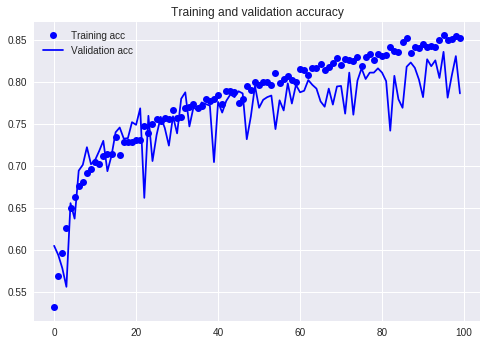

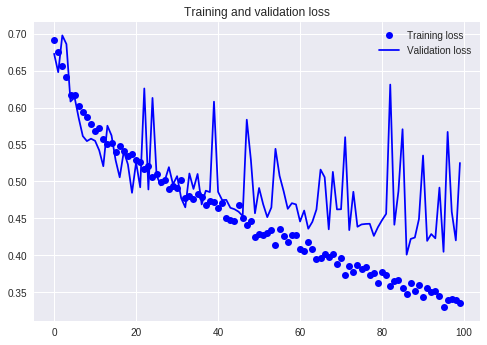

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()